In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score,accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv("train.csv")
df1=pd.DataFrame(train)
test=pd.read_csv("test.csv")
df2=pd.DataFrame(test)

In [3]:
df2.rename(columns={'Personality (class label)': 'Personality (Class label)'}, inplace=True)

In [4]:
df=pd.concat([df1,df2])
df.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


In [5]:
df.Gender.unique()

array(['Male', 'Female', '5'], dtype=object)

In [6]:
from sklearn.impute import SimpleImputer

imputeC = SimpleImputer(missing_values="5", strategy="most_frequent")

imputed_gender_data = imputeC.fit_transform(df[['Gender']])

imputed_gender_data = imputed_gender_data.reshape(-1)

df['Gender'] = imputed_gender_data


In [7]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [8]:
df['Gender'] = df['Gender'].map({'Male': 0,
                                 'Female': 1})


df

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality (Class label)
0,0,17,7,4,7,3,2,extraverted
1,0,19,4,5,4,6,6,serious
2,1,18,7,6,4,5,5,dependable
3,1,22,5,6,7,4,3,extraverted
4,1,19,7,4,6,5,4,lively
...,...,...,...,...,...,...,...,...
310,1,19,6,5,6,4,3,extraverted
311,0,18,2,5,8,3,7,dependable
312,0,18,7,5,6,2,7,serious
313,0,23,6,7,5,4,3,extraverted


In [9]:
df['Personality'] = df['Personality (Class label)'].map({'dependable': 0,
                                           'extraverted': 1,
                                           'lively': 1,
                                           'responsible': 0,
                                           'serious': 0})

df.drop(["Personality (Class label)"],axis=1, inplace=True)
df

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,0,17,7,4,7,3,2,1
1,0,19,4,5,4,6,6,0
2,1,18,7,6,4,5,5,0
3,1,22,5,6,7,4,3,1
4,1,19,7,4,6,5,4,1
...,...,...,...,...,...,...,...,...
310,1,19,6,5,6,4,3,1
311,0,18,2,5,8,3,7,0
312,0,18,7,5,6,2,7,0
313,0,23,6,7,5,4,3,1


In [10]:
df.isna().sum()

Gender               0
Age                  0
openness             0
neuroticism          0
conscientiousness    0
agreeableness        0
extraversion         0
Personality          0
dtype: int64

In [11]:
df.dtypes

Gender               int64
Age                  int64
openness             int64
neuroticism          int64
conscientiousness    int64
agreeableness        int64
extraversion         int64
Personality          int64
dtype: object

In [12]:
df.groupby(by=['Personality', 'Age']).mean()

Gender  openness  neuroticism  conscientiousness  \
Personality Age                                                       
0           5    1.000000  3.500000     5.000000           4.000000   
            17   0.535714  4.928571     4.642857           5.089286   
            18   0.564286  4.942857     4.700000           4.864286   
            19   0.541899  4.798883     4.329609           4.497207   
            20   0.400000  5.000000     4.528571           5.071429   
            21   0.533333  4.816667     4.483333           4.816667   
            22   0.454545  5.318182     4.409091           4.318182   
            23   0.185185  4.444444     3.888889           4.777778   
            24   0.318182  4.772727     4.681818           4.909091   
            25   0.631579  4.947368     4.052632           5.000000   
            26   0.555556  4.111111     4.444444           4.888889   
            27   0.000000  4.714286     5.142857           4.714286   
            28   0.250000  4.250000     5.250000           6.250000   
1           5    0.000000  4.000000     5.000000           5.000000   
            17   0.607843  5.196078     4.882353           4.745098   
            18   0.556962  5.202532     5.012658           4.531646   
            19   0.670213  5.202128     4.627660           4.489362   
            20   0.585366  4.756098     4.878049           4.292683   
            21   0.500000  5.178571     4.964286           4.464286   
            22   0.363636  4.863636     4.818182           5.181818   
            23   0.538462  5.461538     5.461538           4.192308   
            24   0.545455  5.090909     4.090909           4.909091   
            25   0.428571  5.428571     5.571429           3.928571   
            26   0.555556  4.111111     4.888889           5.555556   
            27   0.500000  4.500000     4.166667           5.666667   
            28   0.333333  6.666667     3.333333           5.666667   

                 agreeableness  extraversion  
Personality Age                               
0           5         3.500000      6.000000  
            17        4.500000      4.857143  
            18        4.878571      4.657143  
            19        4.893855      4.731844  
            20        4.785714      4.528571  
            21        4.950000      4.666667  
            22        5.068182      4.318182  
            23        4.814815      5.000000  
            24        3.954545      5.500000  
            25        4.421053      5.000000  
            26        5.111111      4.555556  
            27        5.142857      4.571429  
            28        3.750000      4.500000  
1           5         2.000000      2.000000  
            17        5.137255      4.313725  
            18        4.974684      3.911392  
            19        4.627660      4.670213  
            20        4.780488      3.926829  
            21        5.464286      4.678571  
            22        4.636364      4.318182  
            23        4.730769      4.461538  
            24        4.454545      3.545455  
            25        5.214286      5.000000  
            26        5.000000      4.333333  
            27        5.166667      5.500000  
            28        4.666667      4.000000

<Axes: >

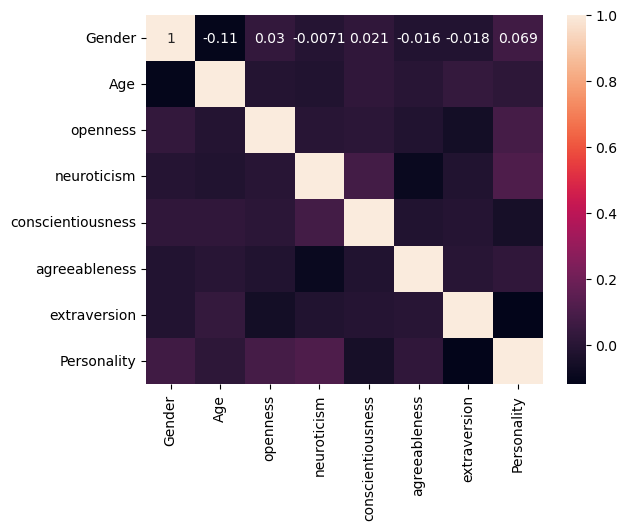

In [13]:
sns.heatmap(df.corr(), annot=True)

In [14]:
df.skew()

Gender              -0.097916
Age                  0.471614
openness            -0.638642
neuroticism         -0.412167
conscientiousness   -0.412381
agreeableness       -0.552094
extraversion        -0.359830
Personality          0.512849
dtype: float64

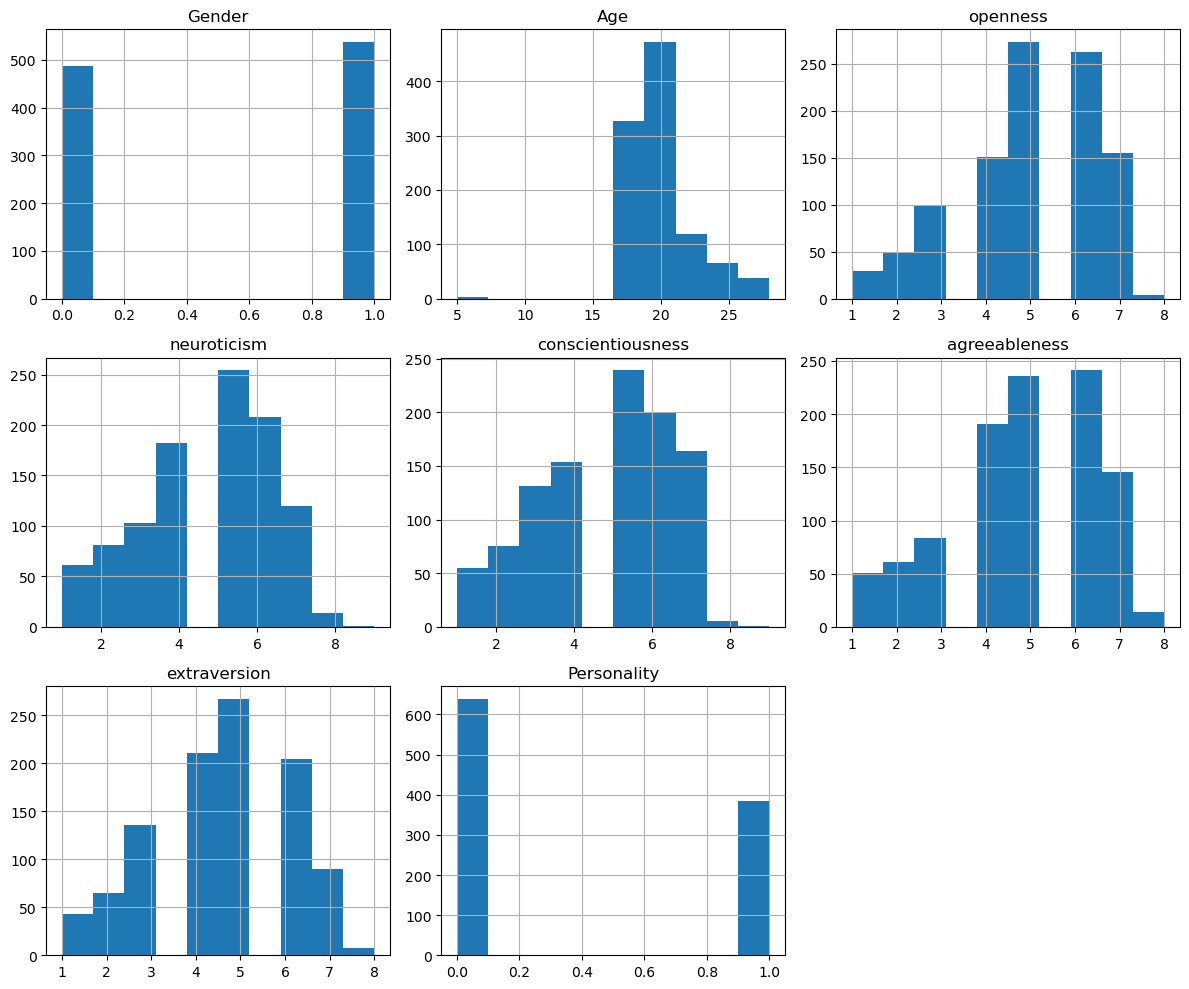

In [15]:
df.hist(figsize=(12, 10))
plt.tight_layout() 
plt.show()

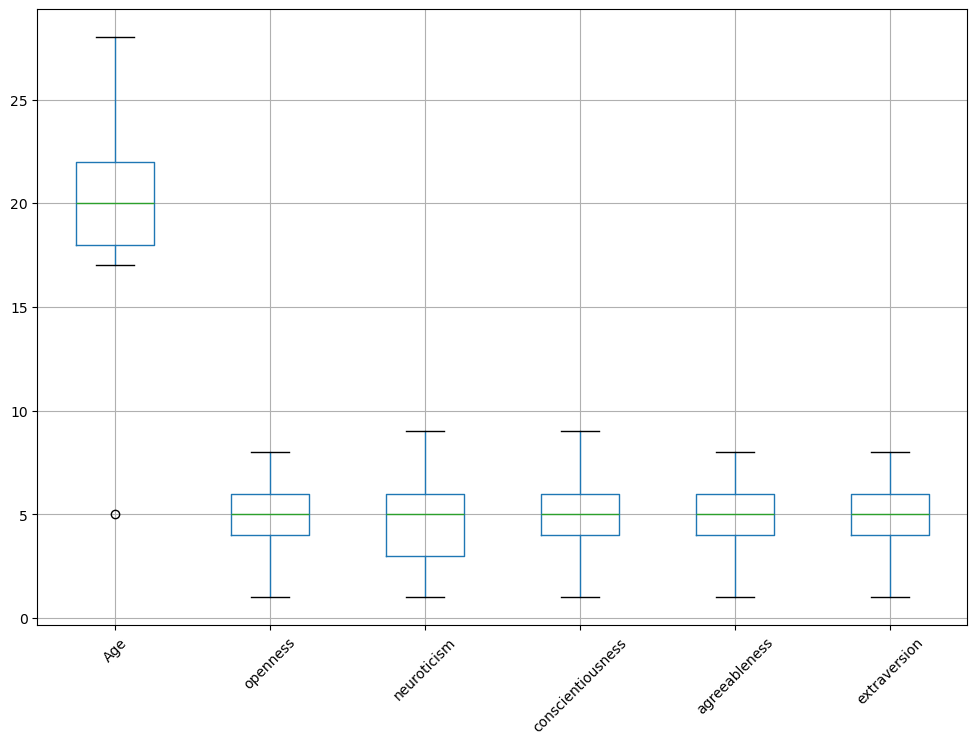

In [16]:
df2.boxplot(figsize=(12, 8))
plt.xticks(rotation=45) 
plt.show()

(array([   0.,    0.,    0.,    0.,    0., 1024.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

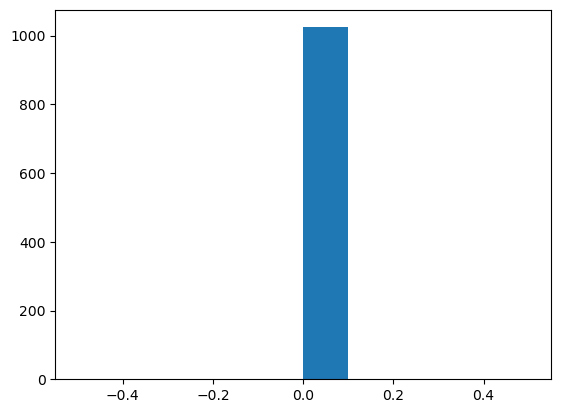

In [17]:
x = np.reciprocal(df['Age'])
plt.hist(x)

(array([  3.,   0.,   0.,   0.,   0.,   0., 599., 199., 152.,  71.]),
 array([2.23606798, 2.54161144, 2.84715491, 3.15269837, 3.45824184,
        3.7637853 , 4.06932876, 4.37487223, 4.68041569, 4.98595916,
        5.29150262]),
 <BarContainer object of 10 artists>)

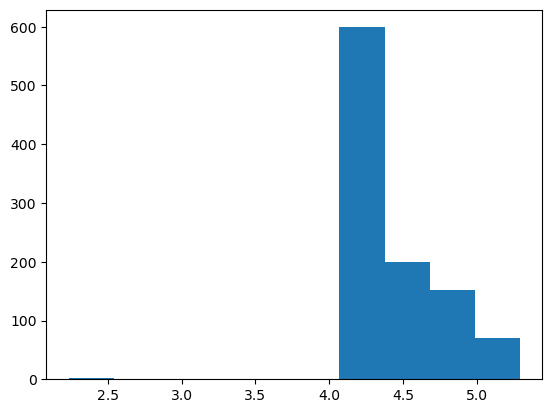

In [18]:
x = np.sqrt(df['Age'])
plt.hist(x)

(array([  3.,   0.,   0.,   0.,   0.,   0., 326., 472., 152.,  71.]),
 array([1.70997595, 1.84263725, 1.97529855, 2.10795985, 2.24062116,
        2.37328246, 2.50594376, 2.63860506, 2.77126637, 2.90392767,
        3.03658897]),
 <BarContainer object of 10 artists>)

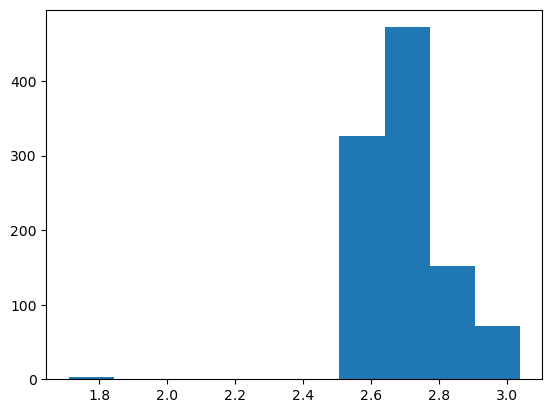

In [19]:
x = np.cbrt(df['Age'])
plt.hist(x)

(array([  3.,   0.,   0.,   0.,   0.,   0.,   0., 599., 318., 104.]),
 array([1.60943791, 1.78171457, 1.95399123, 2.12626789, 2.29854455,
        2.47082121, 2.64309787, 2.81537453, 2.98765119, 3.15992785,
        3.33220451]),
 <BarContainer object of 10 artists>)

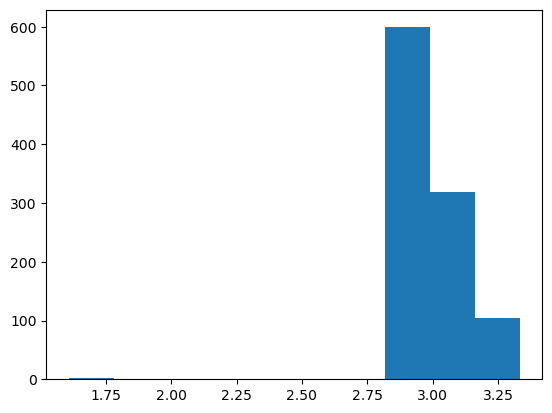

In [20]:
x = np.log(df['Age'])
plt.hist(x)

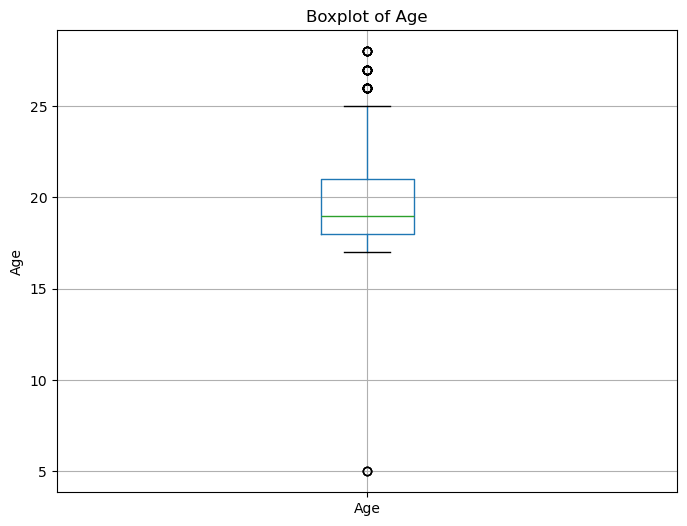

In [21]:
df.boxplot(column='Age', figsize=(8, 6))
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

In [22]:
q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
iqr= q3-q1

In [23]:
upper = q3+ (iqr*1.5)
lower = q1- (iqr*1.5)

print(lower)
print(upper)
print(iqr)

13.5
25.5
3.0


In [24]:
dff = df[(df.Age > lower) & (df.Age < upper)]

In [25]:
dff.shape

(983, 8)

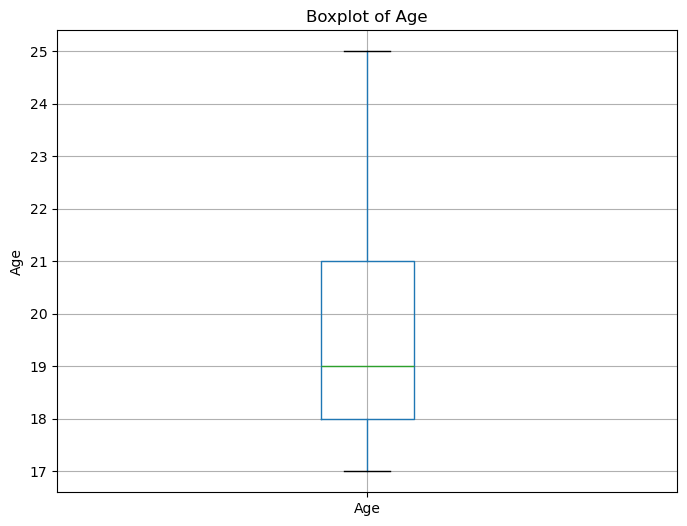

In [26]:
dff.boxplot(column='Age', figsize=(8, 6))
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

# Outlier Detection

In [27]:
d_df=df.drop(['Personality'], axis=1)
d_df["target"]= df['Personality']
label = d_df.target.unique()

a=df[d_df.target==label[0]]
b=df[d_df.target==label[1]]
label

array([1, 0], dtype=int64)

In [28]:
q1=df.groupby(['Personality'],sort=[label]).quantile(0.25)
q3=df.groupby(['Personality'],sort=[label]).quantile(0.75)
iqr= q3-q1

In [29]:
upper = q3+ (iqr*1.5)
lower = q1- (iqr*1.5)

print(pd.DataFrame(lower))
print(pd.DataFrame(upper))

             Gender   Age  openness  neuroticism  conscientiousness  \
Personality                                                           
0              -1.5  13.5       1.0         -1.5                1.0   
1              -1.5  13.5       1.0          1.0               -1.5   

             agreeableness  extraversion  
Personality                               
0                      1.0           1.0  
1                      1.0          -1.5  
             Gender   Age  openness  neuroticism  conscientiousness  \
Personality                                                           
0               2.5  25.5       9.0         10.5                9.0   
1               2.5  25.5       9.0          9.0               10.5   

             agreeableness  extraversion  
Personality                               
0                      9.0           9.0  
1                      9.0          10.5  


In [30]:
a = a[(a.openness < 9)&(a.openness > 1)] 

In [31]:
a = a[(a.neuroticism < 10.5)&(a.neuroticism > -1.5)]

In [32]:
a = a[(a.conscientiousness < 9)&(a.conscientiousness > 1)]

In [33]:
a = a[(a.agreeableness < 9)&(a.agreeableness > 1)] 

In [34]:
a = a[(a.extraversion < 9)&(a.extraversion > 1)]

In [35]:
b = b[(b.openness < 9)&(b.openness > 1)]

In [36]:
b = b[(b.neuroticism < 9)&(b.neuroticism > 1)]

In [37]:
b = b[(b.conscientiousness < 10.5)&(b.conscientiousness > -1.5)] 

In [38]:
b = b[(b.agreeableness < 9)&(b.agreeableness > 1)] 

In [39]:
b = b[(b.extraversion < 10.5)&(b.extraversion > -1.5)] 

In [40]:
df= pd.concat([a,b], axis= 0)
df.shape

(860, 8)

In [41]:
df.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,0,17,7,4,7,3,2,1
3,1,22,5,6,7,4,3,1
4,1,19,7,4,6,5,4,1
5,0,18,5,7,7,6,4,1
6,1,17,5,6,5,7,4,1


# Feature Transformation

In [42]:
df['openness'] = np.sqrt(max(df['openness']+1) - df['openness'])
df['agreeableness'] = np.sqrt(max(df['agreeableness']+1) - df['agreeableness'])
df.skew()

Gender              -0.088613
Age                  0.320565
openness             0.090850
neuroticism         -0.355401
conscientiousness   -0.372805
agreeableness       -0.085628
extraversion        -0.239583
Personality          0.545679
dtype: float64

In [43]:
df.columns

Index(['Gender', 'Age', 'openness', 'neuroticism', 'conscientiousness',
       'agreeableness', 'extraversion', 'Personality'],
      dtype='object')

# Model Training

In [44]:
x=df.drop(["Personality"],axis=1)

y=df["Personality"]

In [45]:
from sklearn.preprocessing import RobustScaler
RobSca= RobustScaler()
rcdata= RobSca.fit_transform(x)

rcdf= pd.DataFrame(rcdata, columns= x.columns)
rcdf.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
0,-1.0,-0.666667,-1.162235,-0.5,1.0,0.891814,-1.5
1,0.0,1.000000,0.000000,0.5,1.0,0.468373,-1.0
2,0.0,0.000000,-1.162235,-0.5,0.5,0.000000,-0.5
3,-1.0,-0.333333,0.000000,1.0,1.0,-0.531627,-0.5
4,0.0,-0.666667,0.000000,0.5,0.0,-1.162235,-0.5


In [46]:
from sklearn.preprocessing import MinMaxScaler
minmax= MinMaxScaler()
mdata= minmax.fit_transform(x)

mdf= pd.DataFrame(mdata, columns= x.columns)
mdf.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
0,0.0,0.521739,0.251687,0.428571,0.857143,0.880747,0.142857
1,1.0,0.739130,0.607625,0.714286,0.857143,0.751066,0.285714
2,1.0,0.608696,0.251687,0.428571,0.714286,0.607625,0.428571
3,0.0,0.565217,0.607625,0.857143,0.857143,0.444813,0.428571
4,1.0,0.521739,0.607625,0.714286,0.571429,0.251687,0.428571


In [47]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sdata=sc.fit_transform(x)
sdf = pd.DataFrame(sdata, columns=x.columns)
sdf

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
0,-1.045207,-1.112704,-1.512813,-0.511009,1.352858,1.328883,-1.743630
1,0.956748,0.845801,0.139554,0.777753,1.352858,0.740146,-1.072403
2,0.956748,-0.329302,-1.512813,-0.511009,0.733008,0.088938,-0.401175
3,-1.045207,-0.721003,0.139554,1.422133,1.352858,-0.650216,-0.401175
4,0.956748,-1.112704,0.139554,0.777753,0.113159,-1.526990,-0.401175
...,...,...,...,...,...,...,...
855,0.956748,-1.112704,-0.616268,-1.155390,0.733008,0.740146,0.941279
856,-1.045207,-0.721003,1.407460,-1.155390,0.733008,0.088938,0.270052
857,-1.045207,0.845801,0.805447,-0.511009,1.352858,0.088938,0.941279
858,-1.045207,-0.721003,1.961068,0.133372,1.972708,1.328883,1.612506


In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y , test_size = 0.20, random_state=2,stratify=y)


In [49]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [50]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.6337209302325582


In [51]:
rX_train, rX_test, y_train, y_test = train_test_split(rcdf, y , test_size = 0.20, random_state=2,stratify=y)


In [52]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(rX_train, y_train)

LogisticRegression()

In [53]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(rX_test)

print(accuracy_score(y_test, y_pred))

0.627906976744186


In [54]:
mmX_train, mmX_test, y_train, y_test = train_test_split(mdf, y , test_size = 0.20, random_state=2,stratify=y)


In [55]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(mmX_train, y_train)

LogisticRegression()

In [56]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(mmX_test)

print(accuracy_score(y_test, y_pred))

0.622093023255814


In [57]:
sX_train, sX_test, y_train, y_test = train_test_split(sdf, y , test_size = 0.20, random_state=2,stratify=y)


In [58]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(sX_train, y_train)

LogisticRegression()

In [59]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(sX_test)

print(accuracy_score(y_test, y_pred))

0.627906976744186


In [60]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [61]:

train_accuracy = model.score(X_train, y_train)
print("Accuracy on training set:", train_accuracy)

test_accuracy = model.score(X_test, y_test)
print("Accuracy on testing set:", test_accuracy)

Accuracy on training set: 0.021517554579534193
Accuracy on testing set: 0.041989047841796245


In [62]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 10)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [63]:
polylr = LinearRegression()

polylr.fit(X_train_poly,y_train)

LinearRegression()

In [64]:
y_hat = model.predict(X_train)

In [65]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [66]:
polylr = LinearRegression()

polylr.fit(X_train_poly,y_train)

LinearRegression()

In [67]:
print("Train score:", polylr.score(X_train_poly,y_train))
print("Test score:", polylr.score(X_test_poly,y_test))

Train score: -0.6581540320979271
Test score: -0.7619945864147435


In [68]:
XM_train_poly = poly.fit_transform(X_train)
XM_test_poly = poly.fit_transform(X_test)

In [69]:
polymlr = LinearRegression()
polymlr.fit(XM_train_poly,y_train)

LinearRegression()

In [70]:
print("Train score:", polymlr.score(XM_train_poly,y_train))
print("Test score:", polymlr.score(XM_test_poly,y_test))

Train score: -0.6581540320979271
Test score: -0.7619945864147435


In [71]:
from sklearn.linear_model import RidgeClassifier

rmodel = RidgeClassifier(alpha = 10000)

rmodel.fit(XM_train_poly, y_train)

RidgeClassifier(alpha=10000)

In [72]:
print("Train score:", rmodel.score(XM_train_poly,y_train))
print("Test score:", rmodel.score(XM_test_poly,y_test))

Train score: 0.6366279069767442
Test score: 0.622093023255814


In [73]:
from sklearn.linear_model import Lasso

lmodel = Lasso(alpha = 0.1)

lmodel.fit(XM_train_poly, y_train)

Lasso(alpha=0.1)

In [74]:
print("Train score:", lmodel.score(XM_train_poly,y_train))
print("Test score:", lmodel.score(XM_test_poly,y_test))

Train score: 0.029802119738133515
Test score: 0.0432429345735762


In [75]:
from sklearn.tree import DecisionTreeClassifier

model_Tree = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)

model_Tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [76]:

from sklearn.neighbors import KNeighborsClassifier

model_K = KNeighborsClassifier(n_neighbors=5)


model_K.fit(X_train, y_train)

KNeighborsClassifier()

In [77]:
print("Train and Test score for Decision Tree model\n")

print("Train score:", model_Tree.score(X_train, y_train))

print("Test score:", model_Tree.score(X_test, y_test))

Train and Test score for Decision Tree model

Train score: 0.998546511627907
Test score: 0.627906976744186


In [78]:
from sklearn.metrics import confusion_matrix

y_pred = model_Tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[76 33]
 [31 32]]


In [79]:
print("Train and Test score for KNN\n")

print("Train score:", model_K.score(X_train, y_train))

print("Test score:", model_K.score(X_test, y_test))

Train and Test score for KNN

Train score: 0.7572674418604651
Test score: 0.627906976744186


In [80]:
from sklearn.metrics import confusion_matrix

y_pred = model_K.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[93 16]
 [48 15]]


In [81]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.5717227179135209
Recall: 0.545653123634775


In [82]:
X_train,X_test, y_train, y_test = train_test_split(x, y , test_size=0.2,random_state=5)
xx_train = RobustScaler().fit_transform(X_train)
xx_test = RobustScaler().fit_transform(X_test)
x_train= pd.DataFrame(xx_train, columns=x.columns)
x_test= pd.DataFrame(xx_test, columns=x.columns)


In [83]:
from sklearn.feature_selection import  SelectKBest, f_classif
obj = SelectKBest(f_classif,k=7)
model1 = LogisticRegression( random_state=8)
d= obj.fit_transform(x_train,y_train)
cv = obj.transform(x_test)
x = pd.DataFrame(d, columns=obj.get_feature_names_out())
t = pd.DataFrame(cv)
model1.fit(x,y_train)
print(f"The Train accuracy is : \n\t {model1.score(x,y_train)*100}% \nThe test accuracy is : \n\t {model1.score(t,y_test)*100}%")

The Train accuracy is : 
	 60.75581395348837% 
The test accuracy is : 
	 69.76744186046511%


In [84]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier(max_depth=8,criterion="entropy")
model5.fit(x,y_train)
print(f"The Train accuracy is : \n\t {model5.score(x,y_train)*100}% \nThe test accuracy is : \n\t {model5.score(t,y_test)*100}%")


The Train accuracy is : 
	 80.81395348837209% 
The test accuracy is : 
	 71.51162790697676%


In [85]:
from sklearn.svm import SVC
model7 = SVC(C=0.5,probability=True)
model7.fit(x,y_train)
print(f"The Train accuracy is : \n\t {model7.score(x,y_train)*100}% \nThe test accuracy is : \n\t {model7.score(t,y_test)*100}%")


The Train accuracy is : 
	 63.372093023255815% 
The test accuracy is : 
	 70.34883720930233%


In [86]:
from sklearn.naive_bayes import GaussianNB
model8 = GaussianNB()
model8.fit(x,y_train)
print(f"The Train accuracy is : \n\t {model8.score(x,y_train)*100}% \nThe test accuracy is : \n\t {model8.score(t,y_test)*100}%")

The Train accuracy is : 
	 62.93604651162791% 
The test accuracy is : 
	 72.09302325581395%


In [87]:
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier(max_depth=8,criterion="entropy")
model5.fit(x,y_train)
print(f"The Train accuracy is : \n\t {model5.score(x,y_train)*100}% \nThe test accuracy is : \n\t {model5.score(t,y_test)*100}%")


The Train accuracy is : 
	 79.21511627906976% 
The test accuracy is : 
	 72.67441860465115%


In [88]:
obj.get_feature_names_out()

array(['Gender', 'Age', 'openness', 'neuroticism', 'conscientiousness',
       'agreeableness', 'extraversion'], dtype=object)

In [89]:
from sklearn.preprocessing import PolynomialFeatures
objj = PolynomialFeatures(3)
xxx =objj.fit_transform(x)
txxx=objj.transform(t)

In [90]:
pd.DataFrame(xxx)

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,1.0,-1.0,-0.666667,-1.162235,-2.0,-0.5,0.000000,-0.5,1.0,0.666667,...,-0.125,0.000000,-0.125,-0.000000,0.000000,-0.125,0.000000,-0.000000,0.000000,-0.125
1,1.0,-1.0,2.000000,1.281209,0.5,0.5,1.281209,0.0,1.0,-2.000000,...,0.125,0.320302,0.000,0.820748,0.000000,0.000,2.103100,0.000000,0.000000,0.000
2,1.0,0.0,0.000000,0.468373,0.0,0.5,0.000000,0.0,0.0,0.000000,...,0.125,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000
3,1.0,0.0,0.000000,0.468373,-1.5,-2.0,0.000000,0.5,0.0,0.000000,...,-8.000,0.000000,2.000,-0.000000,-0.000000,-0.500,0.000000,0.000000,0.000000,0.125
4,1.0,-1.0,-0.333333,0.000000,1.0,0.0,0.468373,0.0,1.0,0.333333,...,0.000,0.000000,0.000,0.000000,0.000000,0.000,0.102748,0.000000,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,1.0,-1.0,0.000000,-0.531627,1.0,0.5,-0.531627,-0.5,1.0,-0.000000,...,0.125,-0.132907,-0.125,0.141314,0.132907,0.125,-0.150252,-0.141314,-0.132907,-0.125
684,1.0,-1.0,-0.333333,1.281209,0.0,-1.0,-1.162235,-2.0,1.0,0.333333,...,-1.000,-1.162235,-2.000,-1.350790,-2.324470,-4.000,-1.569936,-2.701581,-4.648940,-8.000
685,1.0,-1.0,0.000000,-0.531627,-1.0,-0.5,0.468373,0.0,1.0,-0.000000,...,-0.125,0.117093,0.000,-0.109687,-0.000000,-0.000,0.102748,0.000000,0.000000,0.000
686,1.0,-1.0,1.333333,-1.162235,-0.5,1.0,0.000000,0.0,1.0,-1.333333,...,1.000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import  SelectKBest, f_classif
for n in range(4, 35,2):
    print("The feature used ",n)
    obj = SelectKBest(f_classif,k=n)
    model = RandomForestClassifier(max_depth=8 , random_state=1)
    d= obj.fit_transform(xxx,y_train)
    cv = obj.transform(txxx)
    x = pd.DataFrame(d)
    t = pd.DataFrame(cv)
    model.fit(x,y_train)
    print(f"The Train accuracy is : \n\t {model.score(x,y_train)*100}% \nThe test accuracy is : \n\t {model.score(t,y_test)*100}%")
    print(" ")

The feature used  4
The Train accuracy is : 
	 63.51744186046512% 
The test accuracy is : 
	 70.34883720930233%
 
The feature used  6
The Train accuracy is : 
	 64.82558139534885% 
The test accuracy is : 
	 64.53488372093024%
 
The feature used  8
The Train accuracy is : 
	 73.69186046511628% 
The test accuracy is : 
	 66.27906976744185%
 
The feature used  10
The Train accuracy is : 
	 75.72674418604652% 
The test accuracy is : 
	 69.18604651162791%
 
The feature used  12
The Train accuracy is : 
	 75.72674418604652% 
The test accuracy is : 
	 68.02325581395348%
 
The feature used  14
The Train accuracy is : 
	 77.76162790697676% 
The test accuracy is : 
	 71.51162790697676%
 
The feature used  16
The Train accuracy is : 
	 78.34302325581395% 
The test accuracy is : 
	 74.4186046511628%
 
The feature used  18
The Train accuracy is : 
	 78.34302325581395% 
The test accuracy is : 
	 74.4186046511628%
 
The feature used  20
The Train accuracy is : 
	 79.94186046511628% 
The test accuracy

In [92]:
from sklearn.ensemble import RandomForestClassifier

obj = SelectKBest(f_classif,k=10)
model = RandomForestClassifier(max_depth=8 , random_state=1)
d= obj.fit_transform(xxx,y_train)
cv = obj.transform(txxx)
x = pd.DataFrame(d)
t = pd.DataFrame(cv)
model.fit(x,y_train)
print(f"The Train accuracy is : \n\t {model.score(x,y_train)*100}% \nThe test accuracy is : \n\t {model.score(t,y_test)*100}%")
print(" ")

The Train accuracy is : 
	 75.72674418604652% 
The test accuracy is : 
	 69.18604651162791%
 


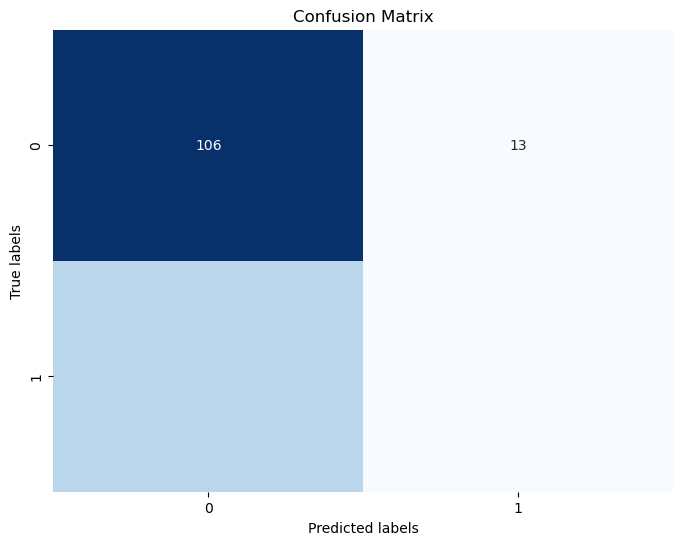

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(t)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


In [94]:
xx=[[1,20,5,8, 9, 5,9]]

In [95]:
ans = model5.predict(xx)
print(f" You are {ans}")

 You are [0]


In [96]:
from sklearn.pipeline import Pipeline

ssl = RobustScaler()


obj2 = SelectKBest(f_classif,k=4)
poly3 = PolynomialFeatures(3)
obj3 = SelectKBest(f_classif,k=10)
estimators = RandomForestClassifier(max_depth=8 , random_state=1)
sk_pipe = Pipeline([ ("rscale", ssl),
                    
                    ("obj2",obj2),
                    ('poly3', poly3),
                    ("obj3", obj3),
                    ('esti',estimators)])


In [97]:
x=df.drop(["Personality"], axis=1)

In [98]:
sk_pipe.fit(x.iloc[:,:],y)

Pipeline(steps=[('rscale', RobustScaler()), ('obj2', SelectKBest(k=4)),
                ('poly3', PolynomialFeatures(degree=3)),
                ('obj3', SelectKBest()),
                ('esti', RandomForestClassifier(max_depth=8, random_state=1))])

In [99]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sns

In [100]:
y1_pred = sk_pipe.predict(x.iloc[:,:])

In [101]:

reports = classification_report(y, y1_pred)
print("Report : \n{}".format(reports))

Report : 
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       543
           1       0.76      0.38      0.51       317

    accuracy                           0.73       860
   macro avg       0.74      0.66      0.66       860
weighted avg       0.74      0.73      0.70       860



In [113]:
#saving machine learning model
import pickle
#save model 
pickle.dump(sk_pipe,open("model.pkl","wb"))
model_g1 = pickle.load(open("model.pkl","rb"))

In [114]:
dd=[[0,24,2,2, 9, 2,3]]

In [115]:
ans = model_g1.predict(dd)
print(f" You are {ans}")

 You are [0]


In [116]:
d1 = [[1, 20,8,9,6,7,8]]
ans = model_g1.predict(d1)
print(f" You are {ans}")

 You are [1]


In [6]:
sklearn.__version__

'1.2.2'

In [5]:
import sklearn 